In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("mtcars.csv") #df user defined dataset

In [3]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
#mpg target variable : millions per gallon

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [6]:
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [7]:
#input features : 
'''cyl : number of cylinders
   disp : displacement
   hp :  Gross Horsepower
   drat :  Rear axle ratio
   wt : weight (lb/1000)
   qsec  1/4 mile time
   vs     V/S (V==0  , S==1)
   am  transmission type  (0 and 1 binary automatic /manaully)
   gear :  Number of forwar gears
   carb : Number of carburetors
   
   Target (output ) : mpg : miles per US gallons  mpg is the derterminant 
   of fuel efficiency
'''

'cyl : number of cylinders\n   disp : displacement\n   hp :  Gross Horsepower\n   drat :  Rear axle ratio\n   wt : weight (lb/1000)\n   qsec  1/4 mile time\n   vs     V/S (V==0  , S==1)\n   am  transmission type  (0 and 1 binary automatic /manaully)\n   gear :  Number of forwar gears\n   carb : Number of carburetors\n   \n   Target (output ) : mpg : miles per US gallons  mpg is the derterminant \n   of fuel efficiency\n'

In [8]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


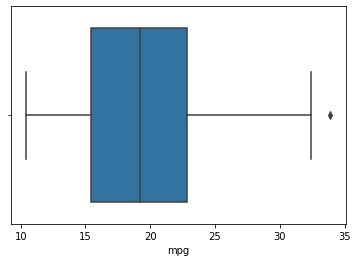

In [9]:
#find outlier  check outlier then we use boxplot 
#boxplot() inbuilt function of seaborn library
sns.boxplot(df["mpg"])
plt.show()

In [10]:
#Implementation
Q1=df['mpg'].quantile(0.25) #Quentile() inbuilt function
Q3=df['mpg'].quantile(0.75)
IQR=Q3-Q1
print("Q1=",Q1)
print("Q3=",Q3)
print("Inter Quentile range : ",IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print("Lower whisker=",Lower_Whisker, "\n Upper whisker=",Upper_Whisker)

Q1= 15.425
Q3= 22.8
Inter Quentile range :  7.375
Lower whisker= 4.362500000000001 
 Upper whisker= 33.8625


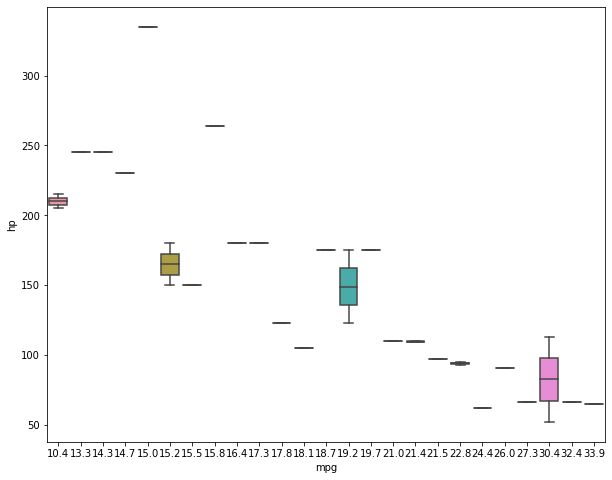

In [11]:
#We check outlier with multiple input variables(2-variables)
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x="mpg",y="hp")
plt.show()

In [12]:
df[df["mpg"]>33]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


In [13]:
df[df["model"]=="Toyota Corolla"]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


In [14]:
df.drop(19,inplace=True)

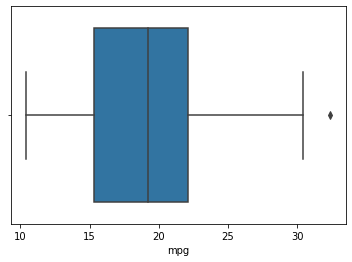

In [15]:
sns.boxplot(df["mpg"])
plt.show()

In [17]:
df[df["mpg"]>30]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


In [20]:
df.drop([17,18,27],inplace=True)

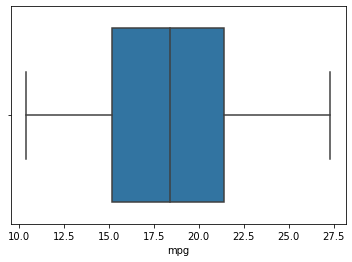

In [21]:
sns.boxplot(df["mpg"])
plt.show()

In [22]:
#Implementation
Q1=df['mpg'].quantile(0.25) #Quentile() inbuilt function
Q3=df['mpg'].quantile(0.75)
IQR=Q3-Q1
print("Q1=",Q1)
print("Q3=",Q3)
print("Inter Quentile range : ",IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print("Lower whisker=",Lower_Whisker, "\n Upper whisker=",Upper_Whisker)

Q1= 15.2
Q3= 21.4
Inter Quentile range :  6.199999999999999
Lower whisker= 5.9 
 Upper whisker= 30.699999999999996


In [23]:
df["mpg"]

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

In [ ]:
#We converts object type data into numeric type data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 31
Data columns (total 12 columns):
model    28 non-null object
mpg      28 non-null float64
cyl      28 non-null int64
disp     28 non-null float64
hp       28 non-null int64
drat     28 non-null float64
wt       28 non-null float64
qsec     28 non-null float64
vs       28 non-null int64
am       28 non-null int64
gear     28 non-null int64
carb     28 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 2.8+ KB


In [26]:
#separate numeric type data and object type data
#we create new dataframe df_cat and df_num
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(["int64","float64"])

In [28]:
df_cat.head()

,model
0,Mazda RX4
1,Mazda RX4 Wag
2,Datsun 710
3,Hornet 4 Drive
4,Hornet Sportabout


In [29]:
df_num.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
